In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [10]:
# Load the dataset
file_path = './dataMining.xls'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Preprocess the text data
X = data['content']
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Decision Tree Classifier Results:
Accuracy: 0.79


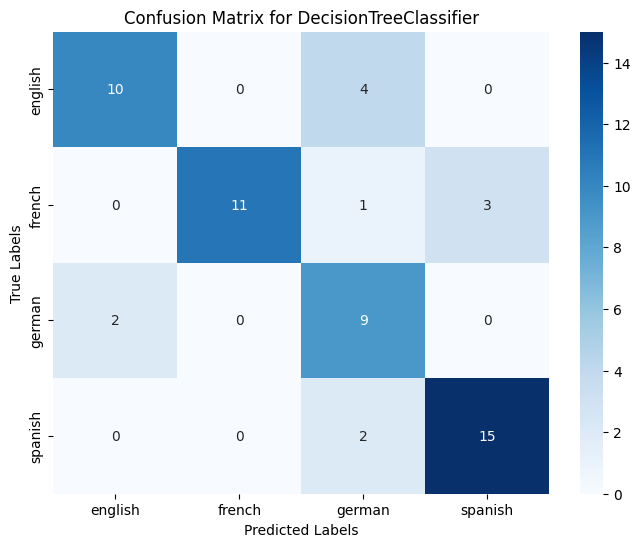

Classification Report:
              precision    recall  f1-score   support

     english       0.83      0.71      0.77        14
      french       1.00      0.73      0.85        15
      german       0.56      0.82      0.67        11
     spanish       0.83      0.88      0.86        17

    accuracy                           0.79        57
   macro avg       0.81      0.79      0.78        57
weighted avg       0.82      0.79      0.80        57



In [9]:
print("Decision Tree Classifier Results:")
evaluate_model(DecisionTreeClassifier(random_state=42), X_train_tfidf, X_test_tfidf, y_train, y_test);

Multinomial Naive Bayes Classifier Results:
Accuracy: 1.00


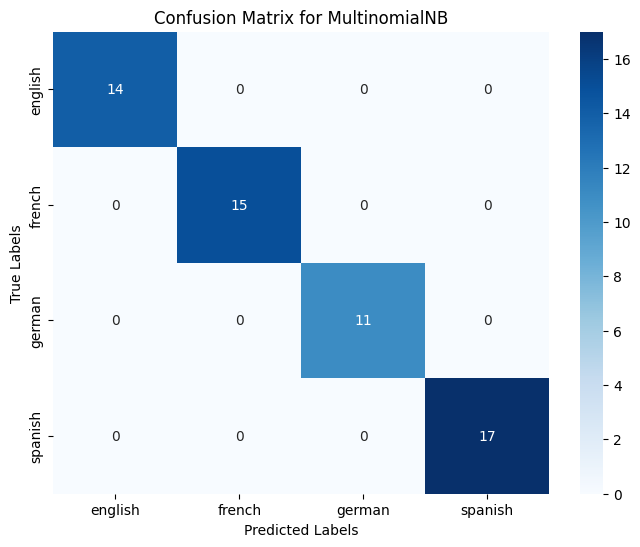

Classification Report:
              precision    recall  f1-score   support

     english       1.00      1.00      1.00        14
      french       1.00      1.00      1.00        15
      german       1.00      1.00      1.00        11
     spanish       1.00      1.00      1.00        17

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [19]:
print("Multinomial Naive Bayes Classifier Results:")
evaluate_model(MultinomialNB(), X_train_tfidf, X_test_tfidf, y_train, y_test);

In [8]:
# Function to evaluate a model and print metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=[str(i) for i in model.classes_]))

In [21]:
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

In [29]:
X_tfidf = vectorizer.fit_transform(data['content'])

dt_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X_tfidf, y, cv=10)
nb_scores = cross_val_score(MultinomialNB(), X_tfidf, y, cv=10)

t_stat, p_value = ttest_rel(nb_scores, dt_scores)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

if p_value < 0.05:
    print("The difference between the two models is statistically significant.")
else:
    print("The difference between the two models is not statistically significant.")

T-statistic: 4.906, P-value: 0.001
The difference between the two models is statistically significant.
